In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cftime
import cmocean.cm as cmo

In [2]:
#infile='/scratch/training/CESM_post/datasets/hires/B.E.13.B1950C5.ne120_t12.cesm-ihesp-1950cntl.013.pop.h.0060-01.nc'
infile='/home/abishekg/Research/datasets/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.2040-06-01.nc'
ds = xr.open_dataset(infile,chunks={'time':1})    
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 30, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 2040-06-02 00:00:00 ... 2040-07-01 00:0...
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound          (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HU                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    days_in_norm_year   timedelta64[ns] ...
    grav                float64 ...
    omega               float64 ...
    radius              float64 ...
    cp_sw               float64 ...
    sound               float64 ...
    vonkar              float64 ...
    cp_air              float64 ...
    rho_air             float64 ...
    rho_sw              float64 ...
    rho_fw              float64 ...
    stefan_boltzmann    float64 ...
    latent_heat_vapor   float64 ...
    latent_heat_fusion  float64 ...
    ocn_ref_salinity    float64 ...
    sea_ice_salinity    float64 ...
    T0_Kelvin           float64 ...
    salt_to_ppt         float64 ...
    ppt_to_salt         float64 ...
    mass_to_Sv          float64 ...
    heat_to_PW          float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    momentum_factor     float64 ...
    hflux_factor        float64 ...
    fwflux_factor       float64 ...
    salinity_factor     float64 ...
    sflux_factor        float64 ...
    nsu

In [6]:
sst = ds.SST
sst

<xarray.DataArray 'SST' (time: 30, nlat: 2400, nlon: 3600)>
dask.array<open_dataset-ed1a5876b9df94b7a3a6b33dd57244d7SST, shape=(30, 2400, 3600), dtype=float32, chunksize=(1, 2400, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2040-06-02 00:00:00 ... 2040-07-01 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Surface Potential Temperature
    units:         degC
    grid_loc:      2110
    cell_methods:  time: mean

In [4]:
sst_0= ds.SST.isel(time=0)

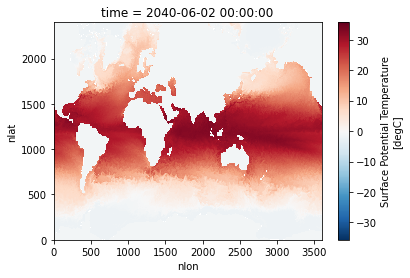

In [7]:
sst_0.plot()

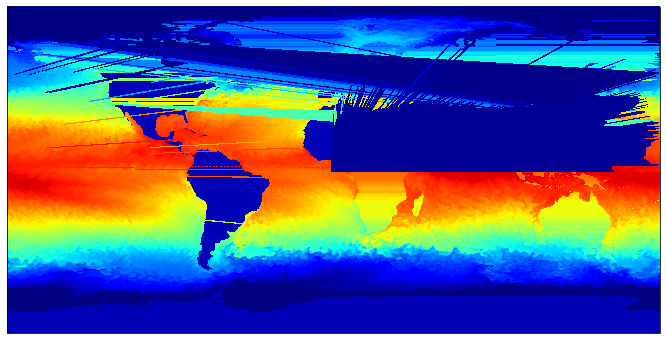

In [8]:
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree());

ax.pcolormesh(ds.TLONG,ds.TLAT,sst_0,transform=cartopy.crs.PlateCarree(),cmap='jet');

In [9]:
POPgridsFile_tx01v2 = '/home/abishekg/Research/datasets/POPgrids_tx0.1v2_2020Jun29.nc'
ds_grid_tx01v2 = xr.open_dataset(POPgridsFile_tx01v2)
ds_grid_tx01v2

<xarray.Dataset>
Dimensions:      (nlat: 2400, nlon: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

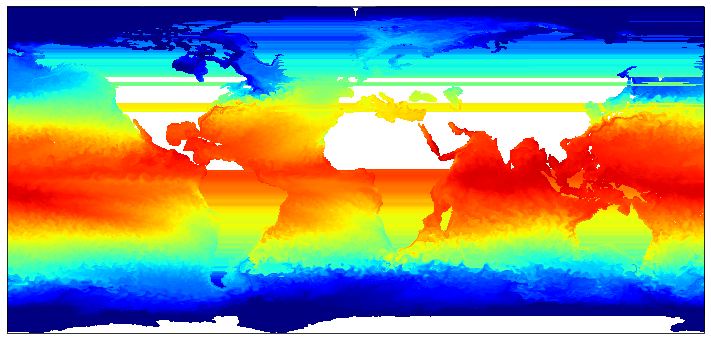

In [16]:
#Fix by Dapeng Li
sst_HR_raw = ds.SST.isel(time=2)
sst_HR_raw2 = sst_HR_raw.where(ds.KMT>0,np.nan) # use ds_HR.KMT to mask land with NaN


fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree());
ax.pcolormesh(ds_grid_tx01v2.TLONG, ds_grid_tx01v2.TLAT, sst_HR_raw2,transform=cartopy.crs.PlateCarree(),cmap='jet')

In [ ]:

#gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-')
#ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=pc)
#ax.set_yticks([-90, -45, 0, 45, 90],crs=pc)
#cb = plt.colorbar(subplt1,shrink=0.5)


In [17]:
ds.SALT[0,:, 100,100].plot();

AttributeError: 'Dataset' object has no attribute 'SALT'